In [1]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
zip_file = tf.keras.utils.get_file(origin=_URL,fname="flower_photos.tgz",extract=True)

228827136/228813984 [==============================] - 460s 2us/step


In [4]:
zip_file

'C:\\Users\\dany\\.keras\\datasets\\flower_photos.tgz'

In [5]:
base_dir = os.path.join(os.path.dirname(zip_file),'flower_photos')

In [6]:
base_dir

'C:\\Users\\dany\\.keras\\datasets\\flower_photos'

In [7]:
os.listdir('C:\\Users\\dany\\.keras\\datasets\\flower_photos')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [8]:
classes = ['roses','daisy','dandelion','sunflowers','tulips']

In [9]:
classes

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [27]:
for cl in classes:
    img_path = os.path.join(base_dir,cl)
    images = glob.glob(img_path+'/*.jpg')
    print("{}:{} Images".format(cl,len(images)))
    num_train = int(round(len(images)*0.8))
    train,val = images[:num_train],images[num_train:]
    for t in train:
        if not os.path.exists(os.path.join(base_dir,'train',cl)):
            os.makedirs(os.path.join(base_dir,'train',cl))
        shutil.move(t,os.path.join(base_dir,'train',cl))
    for v in val:
        if not os.path.exists(os.path.join(base_dir,'val',cl)):
            os.makedirs(os.path.join(base_dir,'val',cl))
        shutil.move(v,os.path.join(base_dir,'val',cl))

roses:638 Images
daisy:629 Images
dandelion:894 Images
sunflowers:695 Images
tulips:795 Images


In [28]:
round(len(images)*0.8)

636

In [29]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [30]:
train_dir

'C:\\Users\\dany\\.keras\\datasets\\flower_photos\\train'

In [31]:
val_dir

'C:\\Users\\dany\\.keras\\datasets\\flower_photos\\val'

In [32]:
batch_size = 10
IMG_SHAPE = 150


In [33]:
image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True)

In [34]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE,IMG_SHAPE)
                                              )

Found 2920 images belonging to 5 classes.


In [43]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img ,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [44]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

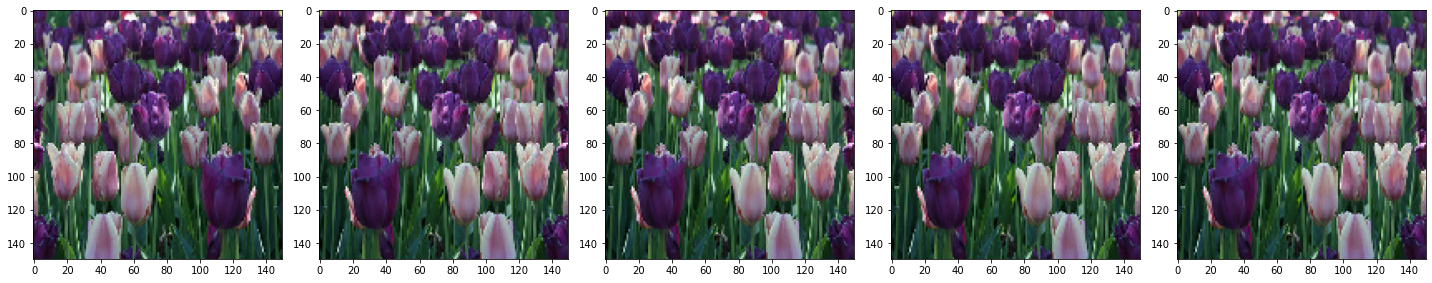

In [45]:
plotImages(augmented_images)

In [46]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                    )

In [47]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                    class_mode='sparse')

Found 2920 images belonging to 5 classes.


In [48]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=val_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse')

Found 731 images belonging to 5 classes.


In [49]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [50]:
model = Sequential()
model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [52]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [53]:
epochs = 80
history = model.fit(train_data_gen,
                   steps_per_epoch=int(np.ceil(train_data_gen.n/float(batch_size))),
                    epochs=epochs,
                   validation_data=val_data_gen,
                   validation_steps=int(np.ceil(val_data_gen.n/float(batch_size))))

Epoch 1/80
292/292 [==============================] - 39s 95ms/step - loss: 1.2990 - accuracy: 0.4404 - val_loss: 1.1555 - val_accuracy: 0.5349
Epoch 2/80
292/292 [==============================] - 23s 80ms/step - loss: 1.0607 - accuracy: 0.5767 - val_loss: 0.9776 - val_accuracy: 0.5992
Epoch 3/80
292/292 [==============================] - 23s 79ms/step - loss: 0.9744 - accuracy: 0.6205 - val_loss: 0.8092 - val_accuracy: 0.6936
Epoch 4/80
292/292 [==============================] - 24s 83ms/step - loss: 0.9243 - accuracy: 0.6301 - val_loss: 0.8509 - val_accuracy: 0.6648
Epoch 5/80
292/292 [==============================] - 27s 93ms/step - loss: 0.8894 - accuracy: 0.6558 - val_loss: 0.8576 - val_accuracy: 0.6840
Epoch 6/80
292/292 [==============================] - 24s 83ms/step - loss: 0.8650 - accuracy: 0.6671 - val_loss: 0.7572 - val_accuracy: 0.7223
Epoch 7/80
292/292 [==============================] - 22s 75ms/step - loss: 0.8423 - accuracy: 0.6733 - val_loss: 0.7034 - val_accuracy:

292/292 [==============================] - 20s 68ms/step - loss: 0.5382 - accuracy: 0.7955 - val_loss: 0.6337 - val_accuracy: 0.7715
Epoch 58/80
292/292 [==============================] - 19s 67ms/step - loss: 0.5150 - accuracy: 0.8000 - val_loss: 0.6173 - val_accuracy: 0.7756
Epoch 59/80
292/292 [==============================] - 20s 67ms/step - loss: 0.5274 - accuracy: 0.7979 - val_loss: 0.6963 - val_accuracy: 0.7661
Epoch 60/80
292/292 [==============================] - 20s 68ms/step - loss: 0.5155 - accuracy: 0.8116 - val_loss: 0.6539 - val_accuracy: 0.7702
Epoch 61/80
292/292 [==============================] - 20s 67ms/step - loss: 0.5096 - accuracy: 0.8103 - val_loss: 0.7003 - val_accuracy: 0.7647
Epoch 62/80
292/292 [==============================] - 20s 67ms/step - loss: 0.5073 - accuracy: 0.8031 - val_loss: 0.6813 - val_accuracy: 0.7688
Epoch 63/80
292/292 [==============================] - 20s 67ms/step - loss: 0.5259 - accuracy: 0.8034 - val_loss: 0.7757 - val_accuracy: 0.75

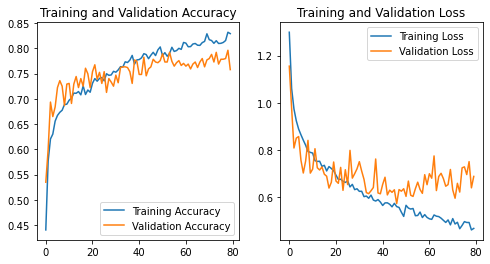

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()